In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\Research\\Models'

In [3]:
pd.set_option("display.max_columns", None)

# Data Loading

In [4]:
data_initial=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/Obtained_Data/second_scenario.csv",dtype={"event_name_1": object,
                                                                                         "event_type_1": object,
                                                                                         "event_name_2": object,
                                                                                         "event_type_2": object,},index_col=0)

In [5]:
data_initial["date"]=pd.to_datetime(data_initial["date"])

In [6]:
data_initial.event_name_1.value_counts()

ValentinesDay          18
StPatricksDay          18
LentWeek2              18
Purim End              18
SuperBowl              18
LentStart              18
PresidentsDay          18
Mother's day           15
IndependenceDay        15
ColumbusDay            15
NBAFinalsEnd           15
NewYear                15
LaborDay               15
Easter                 15
Chanukah End           15
Halloween              15
MartinLutherKingDay    15
Eid al-Fitr            15
VeteransDay            15
MemorialDay            15
EidAlAdha              15
NBAFinalsStart         15
Christmas              15
Pesach End             15
Thanksgiving           15
Ramadan starts         15
OrthodoxChristmas      15
Cinco De Mayo          12
Father's day           12
OrthodoxEaster         12
Name: event_name_1, dtype: int64

In [7]:
data_initial.shape

(5739, 40)

In [9]:
data_initial.head()

,store_id,Total_sales,Sales,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,TX_1,876,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.47,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,TX_2,1176,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.97,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,TX_3,1203,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,3.17,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,TX_1,876,1,2011-01-30,NaN,NaN,NaN,NaN,0,0,0,2.47,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,TX_2,1176,0,2011-01-30,NaN,NaN,NaN,NaN,0,0,0,2.97,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Event Conversion

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
hot_encoder=OneHotEncoder()

## Event

In [12]:
data_initial.drop(["event_name_1", "event_name_2", "event_type_2", "CA", "TX", "WI"], axis=1, inplace=True)

In [13]:
data_initial[data_initial["event_type_1"].isna()]["event_type_1"]=0
data_initial["event_type_1"]=data_initial["event_type_1"].astype(str)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
encoded_event=hot_encoder.fit_transform(data_initial[["event_type_1"]])
array_event=encoded_event.toarray()

In [15]:
hot_encoder.categories_

[array(['Cultural', 'National', 'Religious', 'Sporting', 'nan'],
       dtype=object)]

In [16]:
event_df=pd.DataFrame(array_event,columns=["Cultural", "National", "Religious", "Sporting", 'nan'])

## Store Id

In [17]:
encoded_store=hot_encoder.fit_transform(data_initial[["store_id"]])
array_store=encoded_store.toarray()

In [18]:
hot_encoder.categories_

[array(['TX_1', 'TX_2', 'TX_3'], dtype=object)]

In [19]:
store_df=pd.DataFrame(array_store, columns=['TX_1', 'TX_2', 'TX_3'])

In [20]:
frames=[data_initial, event_df, store_df]
data=pd.concat(frames, axis=1)

In [21]:
data.drop(["event_type_1", "nan", "Total_sales", "store_id"], axis=1, inplace=True)

In [22]:
data.head()

,Sales,date,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3
0,0,2011-01-29,0,0,0,2.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,2011-01-29,0,0,0,2.97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2011-01-29,0,0,0,3.17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,2011-01-30,0,0,0,2.47,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,2011-01-30,0,0,0,2.97,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
data.describe()

,Sales,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3
count,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000,5739.000000
mean,0.567172,0.329326,0.329326,0.329326,2.486210,0.142708,0.142708,0.143231,0.143231,0.142708,0.142708,0.142708,0.082593,0.088866,0.097229,0.090957,0.081025,0.078411,0.081025,0.081025,0.078411,0.081025,0.078411,0.081025,0.176163,0.191323,0.190800,0.190800,0.190800,0.060115,0.018296,0.026660,0.027182,0.008364,0.333333,0.333333,0.333333
std,1.170157,0.470009,0.470009,0.470009,0.161187,0.349805,0.349805,0.350338,0.350338,0.349805,0.349805,0.349805,0.275290,0.284575,0.296296,0.287572,0.272897,0.268840,0.272897,0.272897,0.268840,0.272897,0.268840,0.272897,0.380992,0.393377,0.392966,0.392966,0.392966,0.237720,0.134031,0.161101,0.162629,0.091079,0.471446,0.471446,0.471446
min,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,2.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,2.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,18.000000,1.000000,1.000000,1.000000,3.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Performance Function

In [24]:
def performance_list(ID,actual,forecast):
    name=ID
    n=len(actual)
    error=actual-forecast
    mean=np.mean(actual)
    sd=actual.std()
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=np.sqrt(sum(error**2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    result_df=pd.DataFrame({"Name" :       name ,
                            "# of inst":       n,
                            "Mean":         mean,
                            "Standard Dev.":  sd, 
                            "FBias":       FBias, 
                            "MPE":           MPE, 
                            "MAPE":         MAPE,                                      
                            "RMSE":         RMSE, 
                            "MAD":           MAD, 
                            "WMAPE":      WMAPE}, index=[0])
    return(result_df)

### Train & Test

In [25]:
train=data[data["date"]<((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]

In [26]:
test=data[data["date"]>=((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]
test.reset_index(drop=True, inplace=True)

### Date and Customer Drop

In [27]:
train=train.drop(["date"], axis=1)
test=test.drop(["date"], axis=1)

In [28]:
X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]

# Linear Regression-Elastic Net

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
from sklearn.linear_model import ElasticNet

### Grid

In [31]:
elastic_net_model = ElasticNet()

In [32]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [33]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [34]:
elastic_net.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [35]:
elastic_predictions=elastic_net.predict(X_test)

In [36]:
performance_list("Control", elastic_net.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,4590,0.570153,0.076731,2.287051e-16,0.027968,1.350246,0.017461,0.773422,1.356518


In [37]:
res_elastic=performance_list("Elastic Net Performance", elastic_predictions, y_test)

In [38]:
res_elastic

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,1149,0.550085,0.058462,-0.009417,-0.040858,1.410745,0.031955,0.763283,1.387573


# Support Vector Machines

### Grid

In [39]:
elastic_net_model = ElasticNet()

In [40]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [41]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

### Linear

In [42]:
from sklearn.svm import LinearSVR

In [43]:
sv_regressor=LinearSVR()

### Grid

In [44]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [45]:
sv_regressor = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [46]:
sv_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

### Poly with Kernel

In [47]:
from sklearn.svm import SVR

### Grid

In [48]:
param_grid_svm_poly=[
    {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [49]:
sv_regressor_poly=SVR(kernel="poly")

In [50]:
sv_regressor_poly = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [51]:
sv_regressor_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [52]:
sv_regressor_poly.best_estimator_

SVR(epsilon=0.2, kernel='poly')

### Predictions

In [53]:
svm_predictions_linear=sv_regressor.predict(X_test)

In [54]:
res_svr_linear=performance_list("Support Vector Regressor Linear Performance", svm_predictions_linear, y_test)

In [55]:
svm_predictions_poly=sv_regressor_poly.predict(X_test)

In [56]:
res_svr_poly=performance_list("Support Vector Regressor Polynomial Performance", svm_predictions_poly, y_test)

In [57]:
performance_list("Control", sv_regressor.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,4590,0.5,8.559363e-08,-0.140305,-0.140305,1.518518,0.017629,0.759259,1.518518


In [58]:
performance_list("Control", sv_regressor_poly.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,4590,0.258239,0.171645,-1.207851,-0.890772,2.292441,0.017426,0.600393,2.324954


### Results

In [59]:
res_svr_linear

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Linear Performance,1149,0.482935,0.026051,-0.149772,-0.154953,1.52484,0.031852,0.734422,1.520746


In [60]:
res_svr_poly

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Polynomial Performance,1149,0.343407,0.20955,-0.616932,-1.516019,3.119018,0.033393,0.698165,2.033054


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

### Grid

In [62]:
param_grid=[
    {"n_estimators":[200,300,500], "max_features":[8,12,16],
     "bootstrap":[False,True]}
]

In [63]:
random_reg=RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_reg, param_grid=param_grid,
                 cv=10,return_train_score=True)

### Predictions

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [8, 12, 16],
                          'n_estimators': [200, 300, 500]}],
             return_train_score=True)

In [65]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 500}

### Results

In [66]:
rf_predictions=grid_search.predict(X_test)

In [67]:
res_rf=performance_list("Random Forest Performance", rf_predictions, y_test)

In [68]:
res_rf

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance,1149,0.674981,0.423165,0.177362,-0.52949,1.909896,0.034499,0.833182,1.234378


In [69]:
performance_list("Control", grid_search.predict(X_train), y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Control,4590,0.575215,0.792437,0.0088,NaN,NaN,0.009513,0.363576,0.632071


# Feature Extraction

In [70]:
from sklearn.tree import DecisionTreeRegressor

### Train Node Selection

In [71]:
estimator = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [72]:
on_leaf = estimator.apply(X_train)

In [73]:
X_train_ext=X_train[:]

In [74]:
X_train_ext["Node"] = on_leaf.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
X_train_ext

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node
0,0,0,0,2.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43
1,0,0,0,2.97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20
2,0,0,0,3.17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27
3,0,0,0,2.47,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43
4,0,0,0,2.97,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4585,1,1,1,2.47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
4586,1,1,1,2.47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12
4587,1,1,0,2.47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36
4588,1,1,0,2.47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12


### Test Node Selection

In [76]:
on_leaf_test = estimator.apply(X_test)

In [77]:
X_test_ext=X_test[:]

In [78]:
X_test_ext["Node"] = on_leaf_test.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
X_test_ext

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node
0,1,0,1,2.47,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36
1,1,0,1,2.47,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
2,1,0,1,2.47,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12
3,1,1,1,2.47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36
4,1,1,1,2.47,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,0,0,0,2.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5
1145,0,0,0,2.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
1146,0,0,0,2.47,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36
1147,0,0,0,2.47,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5


### Feature Adding

Ma=1 kullanıldı daha hızlı bir şekilde anlaşılması için

In [80]:
Xframes_feature=[X_train_ext, X_test_ext]
yframes_feature=[y_train, y_test]
X_concat=pd.concat(Xframes_feature)
Y_concat=pd.concat(yframes_feature)
final_frame=[X_concat, Y_concat]
concated_df=pd.concat(final_frame, axis=1)

In [81]:
concated_df["new_feature"] = concated_df.groupby(["Node"])["Sales"].shift(+1)

In [82]:
X_test_new=concated_df.iloc[len(X_train):].drop(["Sales","Node"], axis=1)

y_test_new=concated_df.iloc[len(X_train):]["Sales"]

In [83]:
train_new=concated_df.iloc[:len(X_train)]

In [84]:
train_new.dropna(inplace=True);
train_new.reset_index(drop=True, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
X_train_new=train_new.drop(["Sales","Node"], axis=1)

y_train_new=train_new["Sales"]

## Short Prediction Quality

# Linear Regression-Elastic Net

### Grid

In [86]:
elastic_net_model_new = ElasticNet()

In [87]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [88]:
elastic_net_new = GridSearchCV(estimator=elastic_net_model_new, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [89]:
elastic_net_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [90]:
elastic_predictions_new=elastic_net_new.predict(X_test_new)

In [91]:
res_elastic_new=performance_list("Elastic Net Performance with Feature Extraction", elastic_predictions_new, y_test_new)

In [92]:
res_elastic_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance with Feature Extraction,1149,0.551619,0.112856,-0.00661,-0.03941,1.409613,0.031941,0.761676,1.3808


### SVM

#### Linear

In [93]:
sv_regressor_new=LinearSVR()

### Grid

In [94]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [95]:
sv_regressor_new = GridSearchCV(estimator=sv_regressor_new, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True,)

In [96]:
sv_regressor_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

In [97]:
svm_predictions_new=sv_regressor_new.predict(X_test_new)

res_svr_new=performance_list("SVR Linear Performance with Feature Extraction", 
                                svm_predictions_new, y_test_new)

res_svr_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Linear Performance with Feature Extraction,1149,0.482935,0.026051,-0.149771,-0.154952,1.524839,0.031852,0.734422,1.520745


## Poly

### Grid

In [98]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [99]:
sv_regressor_poly_new=SVR(kernel="poly")

In [100]:
sv_regressor_poly_new = GridSearchCV(estimator=sv_regressor_poly_new, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [101]:
sv_regressor_poly_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [102]:
sv_regressor_poly_new.best_estimator_

SVR(degree=2, epsilon=0.2, kernel='poly')

In [103]:
svm_predictions_poly_new=sv_regressor_poly_new.predict(X_test_new)

res_svr_poly_new=performance_list("SVR Polynomail Performance with Feature Extraction", 
                                svm_predictions_poly_new, y_test_new)

res_svr_poly_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Polynomail Performance with Feature Extrac...,1149,0.301989,0.147108,-0.838693,-1.420931,2.791077,0.033096,0.674667,2.234075


### Random Forest

In [104]:
random_reg_new=RandomForestRegressor()
grid_search_new = GridSearchCV(estimator=random_reg_new, param_grid=param_grid,
                 cv=10,return_train_score=True)

In [105]:
grid_search_new.fit(X_train_new, y_train_new)

grid_search_new.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 300}

In [106]:
rf_predictions_new=grid_search_new.predict(X_test_new)

res_rf_new=performance_list("Random Forest Performance with Feature Extraction", rf_predictions_new, y_test_new)

res_rf_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance with Feature Extraction,1149,0.666786,0.41196,0.167251,-0.278205,1.662058,0.034567,0.835371,1.252831


# General Result Table

In [107]:
pd.options.display.float_format = '{:,.8f}'.format

In [108]:
result_frames=[res_elastic,res_svr_linear,res_svr_poly,res_rf, res_elastic_new,res_svr_new,res_svr_poly_new,res_rf_new]
total_result=pd.concat(result_frames)
total_result.reset_index(drop=True, inplace=True)

In [109]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,1149,0.55008526,0.05846210,-0.00941706,-0.04085842,1.41074528,0.03195489,0.76328342,1.38757293
1,Support Vector Regressor Linear Performance,1149,0.48293512,0.02605084,-0.14977235,-0.15495311,1.52483996,0.03185160,0.73442165,1.52074601
2,Support Vector Regressor Polynomial Performance,1149,0.34340682,0.20954961,-0.61693194,-1.51601862,3.11901784,0.03339256,0.69816470,2.03305428
3,Random Forest Performance,1149,0.67498129,0.42316539,0.17736172,-0.52948965,1.90989590,0.03449902,0.83318181,1.23437763
4,Elastic Net Performance with Feature Extraction,1149,0.55161943,0.11285575,-0.00660966,-0.03941027,1.40961254,0.03194057,0.76167607,1.38079992
5,SVR Linear Performance with Feature Extraction,1149,0.48293550,0.02605097,-0.14977145,-0.15495247,1.52483933,0.03185161,0.73442184,1.52074520
6,SVR Polynomail Performance with Feature Extrac...,1149,0.30198928,0.14710835,-0.83869257,-1.42093108,2.79107652,0.03309568,0.67466657,2.23407457
7,Random Forest Performance with Feature Extraction,1149,0.66678632,0.41195972,0.16725129,-0.27820450,1.66205832,0.03456711,0.83537087,1.25283143


## RFOverfitting

In [110]:
rf_control=grid_search.predict(X_train)

performance_list("RF Performance without Feature Extraction",rf_control, y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,4590,0.57521454,0.79243719,0.00880026,nan,nan,0.00951338,0.36357625,0.63207069


In [111]:
rf_control=grid_search.predict(X_test)

performance_list("RF Performance without Feature Extraction",rf_control, y_test)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,1149,0.67498129,0.42316539,0.17736172,-0.52948965,1.90989590,0.03449902,0.83318181,1.23437763


In [112]:
rf_control_feature=grid_search_new.predict(X_train_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_train_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,4560,0.57491224,0.79905703,0.00976497,nan,nan,0.00802342,0.31450160,0.54704280


In [113]:
rf_control_feature=grid_search_new.predict(X_test_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_test_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,1149,0.66678632,0.41195972,0.16725129,-0.27820450,1.66205832,0.03456711,0.83537087,1.25283143


# Feature Control

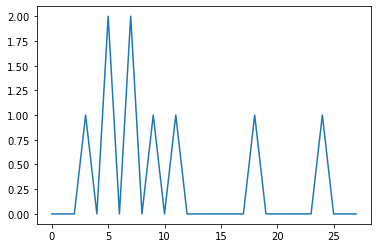

In [114]:
plt.plot(data.Sales[:28])

In [115]:
from statsmodels.graphics.tsaplots import plot_acf

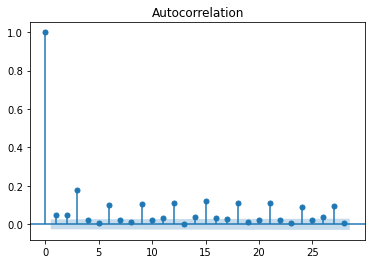

In [116]:
plot_acf(data.Sales, lags=28)
plt.show()

## Node Control

In [117]:
concated_df.Node.value_counts()

5     2050
36     753
12     578
39     335
43     276
51     273
27     241
20     207
6      186
21     100
13      96
37      93
9       93
8       93
28      48
30      33
52      30
44      30
40      30
15      28
16      28
57      21
46      21
54      21
23      20
31      15
58      10
24      10
47      10
55      10
Name: Node, dtype: int64

In [118]:
concated_df[concated_df["Node"]==6].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node,Sales,new_feature
1651,1,1,0,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,6,0,nan
1652,1,1,0,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,1,0.00000000
1654,1,0,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,6,1,1.00000000
1655,1,0,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,6,0,1.00000000
1657,1,1,1,2.47000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,6,0,0.00000000


In [119]:
concated_df[concated_df["Node"]==9].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node,Sales,new_feature
1835,1,1,0,2.47000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,9,4,nan
1838,1,0,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,9,3,4.00000000
1841,1,1,1,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,9,3,3.00000000
1844,1,0,0,2.47000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,9,2,3.00000000
1847,1,1,1,2.47000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,9,1,2.00000000


In [120]:
concated_df[concated_df["Node"]==42].head()

,snap_CA,snap_TX,snap_WI,sell_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016,Cultural,National,Religious,Sporting,TX_1,TX_2,TX_3,Node,Sales,new_feature


# General Function

In [121]:
def result_obtain(df, feature_set, name, lag):

    df[name]=feature_set
    
    train=df[df["date"]<((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
    test=df[df["date"]>=((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
    test.reset_index(drop=True, inplace=True)

    ### Date and Customer Drop

    train=train.drop(["date"], axis=1)
    test=test.drop(["date"], axis=1)

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    train.dropna(inplace=True);
    train.reset_index(drop=True, inplace=True)
    train.index += lag

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    
    
    # Linear Regression-Elastic Net

    elastic_net_function = ElasticNet()

    param_grid_elastic=[
        {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
    ]

    elastic_net_function = GridSearchCV(estimator=elastic_net_function, param_grid=param_grid_elastic,
                     cv=10,return_train_score=True)
    
    elastic_net_function.fit(X_train, y_train)
    

    elastic_predictions=elastic_net_function.predict(X_test)

    res_elastic=performance_list(["Elastic Net Performance Lag " + str(lag)], elastic_predictions, y_test)

    
    
    # Support Vector Machines

    ### Linear

    sv_regressor=LinearSVR()
    

    ### Grid

    param_grid_svm_linear=[
        {"epsilon":[0.5,1,1.5]}
    ]

    sv_regressor_function = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                     cv=10,return_train_score=True)

    sv_regressor_function.fit(X_train, y_train)


    
    sv_regressor_poly=SVR(kernel="poly")
        
    ### Grid

    param_grid_svm_poly=[
        {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
    ]


    sv_regressor_poly_function = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                     cv=10,return_train_score=True)

    sv_regressor_poly_function.fit(X_train, y_train)


    ### Predictions

    svm_predictions_linear=sv_regressor_function.predict(X_test)
    
    svm_predictions_poly=sv_regressor_poly_function.predict(X_test)


    ### Results    

    res_svr_poly=performance_list(["SVR Polynomial Performance Lag " + str(lag)], svm_predictions_poly, y_test)

    res_svr_linear=performance_list(["SVR Linear Performance Lag " + str(lag)], svm_predictions_linear, y_test)

    
    
    
    # Random Forest
    
    ### Grid

    param_grid=[
        {"n_estimators":[200,300,500], "max_features":[8,12,16],
         "bootstrap":[False,True]}
    ]

    random_reg_function=RandomForestRegressor()
    grid_search = GridSearchCV(estimator=random_reg_function, param_grid=param_grid,
                     cv=10,return_train_score=True)

    ### Predictions

    grid_search.fit(X_train, y_train)

    ### Results

    rf_predictions=grid_search.predict(X_test)

    res_rf=performance_list(["Random Forest Performance Lag " + str(lag)], rf_predictions, y_test)
    
    res_df=[res_elastic, res_svr_linear, res_svr_poly, res_rf]

    total_res=pd.concat(res_df)
    
    return total_res

In [122]:
res1=result_obtain(data.copy(), data["Sales"].shift(+1), "lag1", 1)

In [123]:
res1

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 1,1149,0.55043919,0.07846431,-0.00876801,-0.04886945,1.41875630,0.03198369,0.76354907,1.38716334
0,SVR Linear Performance Lag 1,1149,0.48293498,0.02605093,-0.14977268,-0.15495353,1.52484039,0.03185161,0.73442161,1.52074635
0,SVR Polynomial Performance Lag 1,1149,0.27160856,0.12144877,-1.04435913,-1.36516532,3.08892365,0.03325696,0.66571158,2.45099626
0,Random Forest Performance Lag 1,1149,0.67209037,0.46049819,0.17382323,-0.72628002,2.10823460,0.03524115,0.84394948,1.25570833


In [124]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,1149,0.55008526,0.05846210,-0.00941706,-0.04085842,1.41074528,0.03195489,0.76328342,1.38757293
1,Support Vector Regressor Linear Performance,1149,0.48293512,0.02605084,-0.14977235,-0.15495311,1.52483996,0.03185160,0.73442165,1.52074601
2,Support Vector Regressor Polynomial Performance,1149,0.34340682,0.20954961,-0.61693194,-1.51601862,3.11901784,0.03339256,0.69816470,2.03305428
3,Random Forest Performance,1149,0.67498129,0.42316539,0.17736172,-0.52948965,1.90989590,0.03449902,0.83318181,1.23437763
4,Elastic Net Performance with Feature Extraction,1149,0.55161943,0.11285575,-0.00660966,-0.03941027,1.40961254,0.03194057,0.76167607,1.38079992
5,SVR Linear Performance with Feature Extraction,1149,0.48293550,0.02605097,-0.14977145,-0.15495247,1.52483933,0.03185161,0.73442184,1.52074520
6,SVR Polynomail Performance with Feature Extrac...,1149,0.30198928,0.14710835,-0.83869257,-1.42093108,2.79107652,0.03309568,0.67466657,2.23407457
7,Random Forest Performance with Feature Extraction,1149,0.66678632,0.41195972,0.16725129,-0.27820450,1.66205832,0.03456711,0.83537087,1.25283143
